# Data models and analyses techniques: Exercise sheet 1

#### *Your name:* Jan Pedersbæk

## Introduction

For each lecture there will be a collection of exercises presented as Jupyter notebooks. The exercises should be solved and documented as a mini-project that will form the basis for the examination. When solving the exercises it is therefore important that you 
 * document all relevant results and analyses that you have obtained/performed during the exercises.
 * try to relate your results to the theoretical background of the methods being applied. 

The documentation should be integrated (by adding new code/markdown cells) in the Jupyter notebooks containing the exercise sheets.

The mini-project should be delivered after the last seminar in this module (an exact date will be provided later) and should consist of:
 - a single pdf-file containing all the notebooks; the 'File' menu gives you the option of downloading a pdf-version of your notebook. The name of the file should be [your\_first\_name]_[your\_family\_name].pdf (e.g. Thomas\_Nielsen.pdf).
 - a copy of your notebooks with the solutions to the exercises. The notebooks should be named [your\_first name]\_[your\_family\_name]\_[exercise\_sheet\_number].ipynb (e.g., Thomas\_Nielsen\_1.ipnyb).
 
If you have any questions about the exercises, you are strongly encouraged to post you questions on the discussion forum on Moodle.

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

# Exercises

We shall once again play around with the Boston housing data set

In [257]:
from sklearn.datasets import load_boston
data = load_boston()

Again we treat it as a classification problem:

 ### A note on the dataset target variable
 Since the target in our dataset is a continous nummerical variable, we need to 
 change it into a categorical one for this to be a classification problem. 
 Alternatively, it could have been treated as a regression problem.
 The new targetarray - c - is set to 1 if target value, eg. MEDV is greater the the median
 otherwise it is set to 0. Thus, the classification aims to build a model that can predict wether or not 
 the MEDV variable is greater or smaller then the median.

In [258]:
import numpy as np
from sklearn.model_selection import train_test_split
c = np.array([1 if y > np.median(data['target']) else 0 for y in data['target']])

Lets escribe the dataset, and maybe do some visualizations to understand the data a little better

In [259]:
print(data['DESCR'][:3000])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [260]:
# This dataset contains 4 numpy arrays, of witch the first contain information 
# on the arrays
print("The keys of the object: {}".format(data.keys()))

The keys of the object: dict_keys(['data', 'DESCR', 'target', 'feature_names'])


Pandas has pretty printing, so lets take a look at the first row as a Pandas DataFrame

In [261]:
import pandas as pd
# Splitting into train and test datasets (75% train / 25% test is default)
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, 
                                                    random_state=0)
pd.DataFrame([X_test[0,:]], columns=data.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


### Model learning
* Learn a decision tree using the training data and evaluate its performance on both the training data and the test data. Generate random training/test partitions or varying sizes and analyze how the accuracy results vary (consult the documentation for `train_test_split(.)`).

We´ll import the decisionTreeClassifier and instaciate it. Then we will train it using standard parameters and the first train/test split of 75% train and 25% test, which we have already created in the above code

In [262]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, c_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [263]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, 
                                                           c_train)))

print("Accuracy on test set: {:.3f}".format(tree.score(X_test, 
                                                       c_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.795


Lets see, if the sizes of train / test dataset has an impact - we´ll train/test on 50/50 this time:

In [264]:
X_train_new, X_test_new, c_train_new, c_test_new = (
    train_test_split(data['data'], c,
                     random_state=0,
                     train_size=0.5,
                     test_size=0.5))

treeNew = DecisionTreeClassifier(random_state=42).fit(X_train_new, 
                                                      c_train_new)

print("Accuracy on training set: {:.3f}".format(treeNew.score(X_train_new, 
                                                              c_train_new)))

print("Accuracy on test set: {:.3f}".format(treeNew.score(X_test_new, 
                                                          c_test_new)))

Accuracy on training set: 1.000
Accuracy on test set: 0.791


The above shows, that the choice of test/train split can affect the performance of the algorithm, but in this case not a lot

As can be seen, the accuracy of the model on the training set is perfect since the algorithm has been instructed to keep splitting until a perfect model is obtained (default setting). However, the precision on the test set is significantly lower in both cases, which might imply overfitting. I will dive into this later, when adjusting parameters for the algorithm, but first, lets take a look at the learned model and the important features

### Model analysis

* Display the decision tree learned using the training data.
* What are the most important features as determined by the learned tree and does, e.g., the choice of top node seem reasonable to you based on your knowledge of the data domain?
* How does the features deemed *most important* by the decision tree learner match the generated tree and your understanding of the domain?

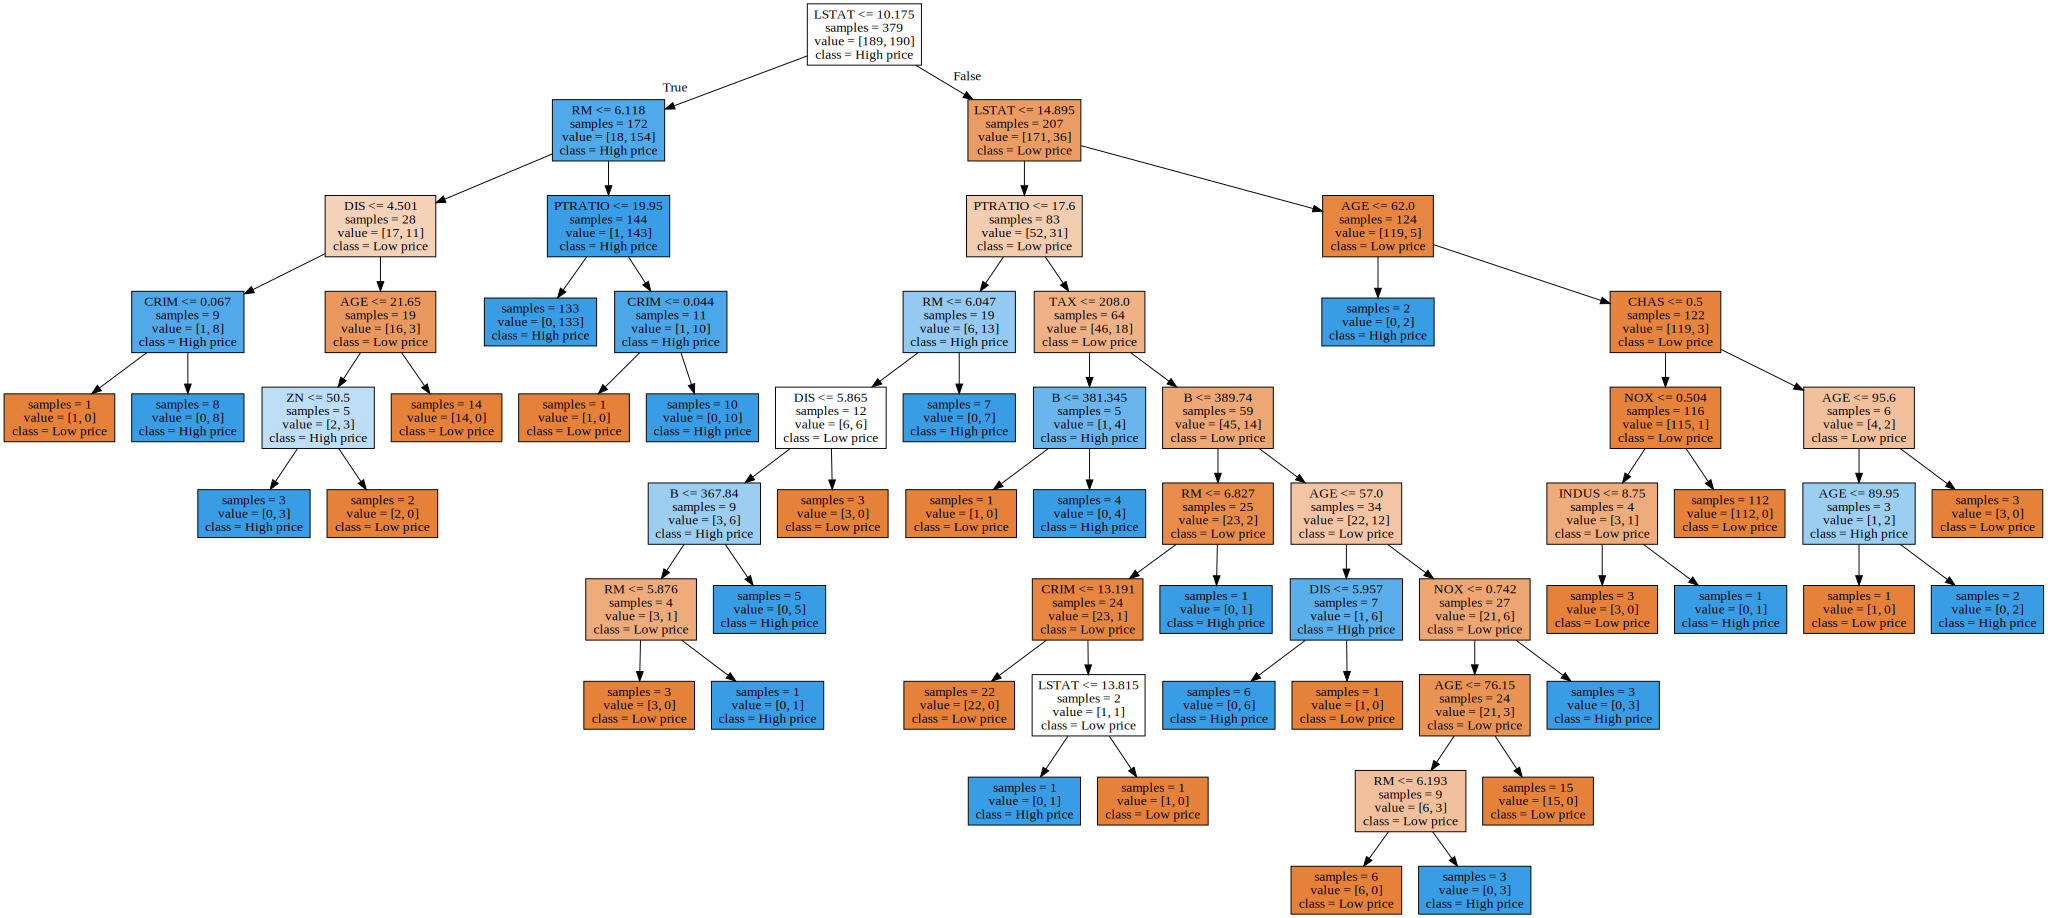

In [265]:
from sklearn.tree import export_graphviz
import graphviz
def displayTree(tree):
    export_graphviz(tree, out_file="tree2.dot", 
                    class_names=["Low price", "High price"],
                    feature_names=data.feature_names, 
                    impurity=False, filled=True)
    
    with open("tree2.dot") as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
displayTree(tree)


##### Feature importance
So, what is the most important features when trying to determine the target of the classification ? Well, as seen above, the first node in the tree is LSTAT, which according to the documentation is "% lower status of the population", which describes "social status". It is not defined further what this means, but it seems reasonable to presume, this covers socioeconomic status, based on a mix of fx. income, education, occupation etc. Also, it seems reasonable, that this measure should have a large impact on the target variable of below or above median housing prices. 

Below, the features and their importance in the decisiontree is plotted:

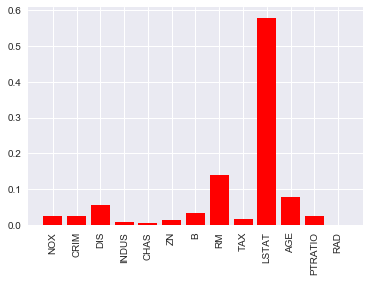

In [266]:
important_features_dict = {}
for x,i in enumerate(tree.feature_importances_):
    important_features_dict[data.feature_names[x]]=i

plt.bar(range(len(important_features_dict)), 
        list(important_features_dict.values()), 
        align='center', color='red')

plt.xticks(range(len(important_features_dict)), 
           list(important_features_dict.keys()), 
           rotation='vertical')
plt.show()

In [267]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.0238135   0.012665    0.00791562  0.00634851  0.02409564  0.13912057
  0.07807657  0.05404269  0.          0.01540416  0.02599372  0.0329634
  0.57956063]


#### Feature importance in the tree
Lets look at the most important features and see, how they are represented in the tree:
##### Most important:

As can be seen above, the most important feature is by far the LSTAT measure. This corresponds to the fact, that the very first split in the tree is is done on this feature. If we follow the "Low price" leg of the first split, it is seen, that the very same feature is used in the next split. Thus, it seems reasonable, that this is the most important feature.


#### Second-most important
Following the "High price" leg, the RM (rooms pr. dwelling) feature is used for the next split, which supports the fact, that this is the second-most important feature in the model. This split finds, that if the number of rooms pr. dwelling is below 7 (actually, below 6.118, but number of rooms must be integers), then we move into an area, where most prices are in the "Low" category.


### Model complexity
* Try controlling the complexity of the learned decision tree by adjusting the parameters max\_depth, min\_samples\_split, min\_samples\_leaf
* Investigate the effect when changing these parameters:
    - Visualize (some of) the trees
    - Evaluate the performance of the models on both the training data and the test data
* By designating part of the data as *validation data*, try to automatically find good values for the parameters controlling the size of the tree. How does the obtained parameters match your manual investigation?
* Instead of using a validation set, try to find good parameter values using cross-validation. How does the results compare to those that you found above?

#### Playing with depth parameter
Lets play around with the depth parameter, to find the optimal depth. The way we define optimal depth is the depth that results in the greatest accuracy of the model when scored on a test set, that has not been part of the model training. We´ll will try depth of 2 to 15 levels to illustrate. To avoid doing this "by hand", we loop over individual depths, and capture the optimal one. The individual accuracies are measured on a validation set, that is taken out of the trainingset. This way, we still have an "un-touched" test set to use for testing the final model, when we have found the optimal parameters.<br><br> 

Note, that this is one (quite cumbersome) way of finding the optimal parameters - there is another more standardized way (Grid Search Cross Validation), but just for illustration purposes, lets code the loop to show the principle - later on, we´ll will be using the Grid Search approach instead.

In [268]:
# We need to split the trainingset into train- and validation subsets, 
# so that we do the final testing on an independent dataset that has 
# not been used in either training or finding the optimal parameters
X_train, X_validation, c_train, c_validation = train_test_split(X_train, 
                                                                c_train, 
                                                                random_state=0)

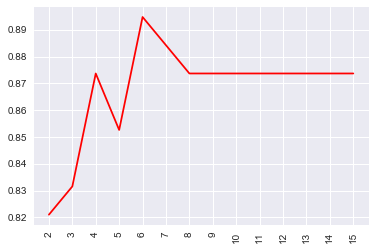

Trainingset size: 284
Optimal depth: 6
Best accuracy on validation set: 0.894736842105
Accuracy on test set: 0.7637795275590551 


In [269]:
depths = [2, 3, 4,5,6,7,8,9,10,11,12,13,14,15]
depthDict={}
optimalDepth = 0
bestAccuracy = 0

for depth in depths:
    tree2 = DecisionTreeClassifier(random_state=42, max_depth=depth)
    tree2.fit(X_train, c_train)
    depthDict[depth] = tree2.score(X_validation, c_validation)
    if tree2.score(X_validation, c_validation) > bestAccuracy:
        optimalDepth = depth
    bestAccuracy = max(bestAccuracy, tree2.score(X_validation, c_validation))
    
plt.plot(range(len(depthDict)), 
         list(depthDict.values()), 
         color='red')

plt.xticks(range(len(depthDict)), 
           list(depthDict.keys()), 
           rotation='vertical')

plt.show()
print("Trainingset size: {}".format(X_train.shape[0]))
print("Optimal depth: " + str(optimalDepth))
print("Best accuracy on validation set: " + str(bestAccuracy))

tree3 = DecisionTreeClassifier(random_state=42, 
                               max_depth=optimalDepth).fit(X_train, 
                                                           c_train)

print("Accuracy on test set: {} ".format(tree3.score(X_test, 
                                                     c_test))) 



Now, it seems that the optimal depth in this case is 6 levels. Lets expand the loop to include 
* max_depth
* min_samples_split
* min_samples_leaf

As mentioned earlier, since this is a greedy algorithm seeking local optima when doing the splits, there might be other optima that are better than the one we´ve just captured. However, we could also play with the seed for the random numbers generator, that determines where the algorithm starts looking for optimas. Instead, we will give it the same seed as above, so that the results are comparable:

In [270]:
# Setting lists of random_state and depth parameters to test
import datetime
minSamplesSplits = list(range(2,100))
depths = list(range(1,15))
minSamplesLeafs = list(range(1,50))

# Set variables to capture optimal values
optimalDepth = 0
optimalMinSamplesSplit = 0
bestAccuracy = 0
# Loop through the lists of parameters and capture optimal values
for depth in depths:
    start=datetime.datetime.now()
    for minSamplesSplit in minSamplesSplits:
        for minSamplesLeaf in minSamplesLeafs:
            tree2 = DecisionTreeClassifier(random_state = 42, 
                                           min_samples_split=minSamplesSplit, 
                                           max_depth=depth, 
                                           min_samples_leaf = minSamplesLeaf)
            tree2.fit(X_train, c_train)
            if tree2.score(X_validation, c_validation) > bestAccuracy:
                optimalParameters = ({'max_depth':depth, 
                                      'min_samples_split': minSamplesSplit, 
                                      'min_samples_leaf':minSamplesLeaf})
                optimalDepth = depth
                optimalMinSamplesSplit = minSamplesSplit
        bestAccuracy = max(bestAccuracy, tree2.score(X_validation, 
                                                     c_validation))
    
    print("Done depth "+str(depth)+" of 15 "+"in "+
          str((datetime.datetime.now()-start).seconds)+
          " secs")
    
print("Optimal depth / min_samples_split / min_samples_leaf : " 
      + str(optimalParameters.get('max_depth')) + " / " 
      + str(optimalParameters.get('min_samples_split'))+ " / " 
      + str(optimalParameters.get('min_samples_leaf')))
print("Best accuracy optained (on validationset): " + str(bestAccuracy))

# Having found the optimal parameters, lets do a validation of the model 
# to get a measure of the accuracy:
tree3 = DecisionTreeClassifier(**optimalParameters)
tree3.fit(X_train, c_train)
print("Accuracy on testset: ")
tree3.score(X_test, c_test)


Done depth 1 of 15 in 3 secs
Done depth 2 of 15 in 4 secs
Done depth 3 of 15 in 4 secs
Done depth 4 of 15 in 5 secs
Done depth 5 of 15 in 5 secs
Done depth 6 of 15 in 5 secs
Done depth 7 of 15 in 5 secs
Done depth 8 of 15 in 5 secs
Done depth 9 of 15 in 5 secs
Done depth 10 of 15 in 5 secs
Done depth 11 of 15 in 5 secs
Done depth 12 of 15 in 5 secs
Done depth 13 of 15 in 5 secs
Done depth 14 of 15 in 5 secs
Optimal depth / min_samples_split / min_samples_leaf : 14 / 21 / 4
Best accuracy optained (on validationset): 0.831578947368
Accuracy on testset: 


0.82677165354330706

As seen above, this actually helped us improve the model by a few points. <br>It seems that the optimal parameters in this case are: 14 / 21 / 4 (Optimal depth / min_samples_split / min_samles_leaf).<br><br>
Now, as mentioned, there is another more standardized way of doing this sort of thing, and that is called Grid Search Cross Validation. Basically, it does the same thing (looping over parameter combinations), but instead of checking accuracy of the individual parameter combinations by testing on a validation set, it does cross validation instead. This means splitting the training data into "folds", training on n-1 folds and testing on the last fold. The default number of folds i scikit´s GridSearchCV is 3 - lets try looking for some of the other parameters (min_samples_split, max_depth and min_samples_leaf) as mentioned in the exercise text.<br><br>
Note, that when doing cross validation, we don´t neeed the validation set, so we´ll do the original split again:

In [272]:
# Note: takes about 9 minutes
X_train, X_test, c_train, c_test = train_test_split(data['data'], c, 
                                                    random_state=0)

from sklearn.model_selection import GridSearchCV
import datetime
params = {'min_samples_split':list(range(2,100)), 
          'max_depth': list(range(1,15)), 
          'min_samples_leaf':list(range(1,50))}
start=datetime.datetime.now()
print("Started at: "+str(start))
gs=GridSearchCV(DecisionTreeClassifier(),params, verbose=1)
gs.fit(X_train, c_train)
print("Training took {} seconds ".format((datetime.datetime.now()-
                                          start).seconds))

print("Optimal parameters are: "+str(gs.best_params_))

Started at: 2018-03-28 20:26:38.731413
Fitting 3 folds for each of 67228 candidates, totalling 201684 fits


[Parallel(n_jobs=1)]: Done 201684 out of 201684 | elapsed:  7.4min finished


Training took 448 seconds 
Optimal parameters are: {'min_samples_split': 2, 'max_depth': 4, 'min_samples_leaf': 9}


In [273]:
print("Optimal parameters are: "+str(gs.best_params_))

print("Accuracy on test set: {} ".format(gs.score(X_test, 
                                                  c_test)))

Optimal parameters are: {'min_samples_split': 2, 'max_depth': 4, 'min_samples_leaf': 9}
Accuracy on test set: 0.7716535433070866 


So, we got quite a different result, than when using the validationset, so which should we trust ? Well, since the cross-validation method has found parameters and estimated accuracies on much more "unseen" data, we should towards trusting the latter version. The cross validation technique ensures, that all trainingdata is used for parameter optimization, instead of just 25% when using the validation set technique. <br><br>
Lets visualize the resulting tree:

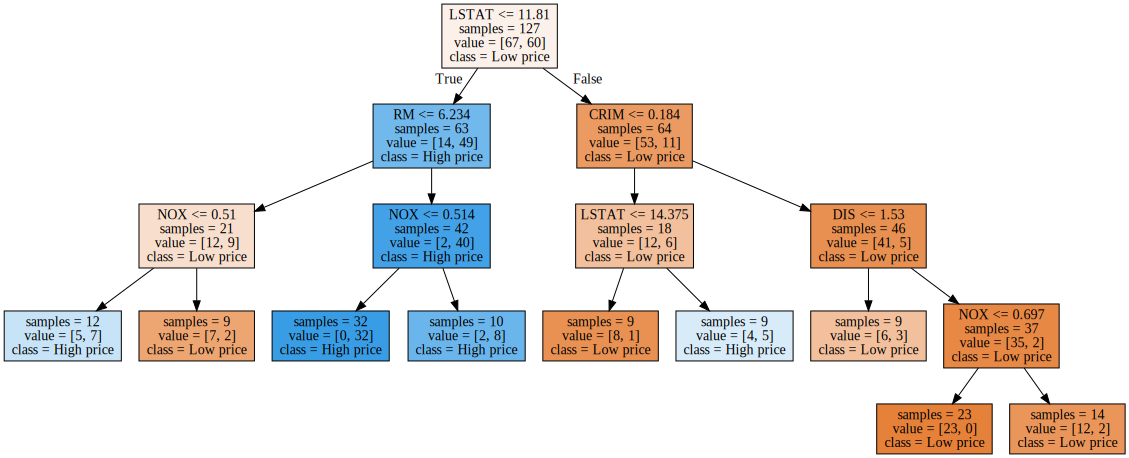

In [274]:
tree4=DecisionTreeClassifier(**gs.best_params_).fit(X_test, c_test)
displayTree(tree4)

# Data models and analyses techniques: Exercise sheet 2

#### *Your name: Jan Pedersbæk

## Exercises

In this exercise we shall expore and compare the k-nearest neighbor classifier and the naive Bayes model. The analysis will be based on the *California housing* data set.

In [277]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [278]:
import numpy as np
from sklearn.model_selection import train_test_split
c = np.array([1 if y > np.median(data['target']) 
              else 0 for y in data['target']])

X_train, X_test, c_train, c_test = train_test_split(data['data'],c,random_state=0)

Lets look at data in a pandas dataframe to get a sense of the data. <br>We´ll print the first row, just to get an idea:

In [279]:
import pandas as pd
print(data['DESCR'][:3000])
pd.DataFrame([X_train[0,:]], columns=data.feature_names)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,7.3003,19.0,7.9616,1.1376,1926.0,3.0816,38.46,-122.68


### K-nearest neighbor
* Classify the instances in the test set using default settings for the k-NN classifier.
* Try experimenting with different values for 'k'. How do the values affect the classification results? Feel free to try to automate this process using the methods explored in the previous exercise sheet. 
* Try to get some more insight into the data by generating descriptive statistics and by plotting the data. 
* Based on your understanding of the data and the properties of the k-NN classifier, does it seem reasonable to try to manipulate the data (e.g. through normalization) or work with different distance metrics in order to improve the performance of the classifier? How does such changes affect classification accuracy?

##### Classifying using KNN (K=5)
The KNN algorithm works on distance measures - eg. Euclidian distance or Manhattan distances, which both calculate absolute distances. Therefor, it would be sensible to scale the input data before training the model. This way, we can avoid that the features that have big scale migt be considered to be far away, eventhough they might be (relatively) close by. So, lets scale the train_vector, so that all input values are between 0-1 but keep their relative variance. We do this using the MinMaxScaler, but first, lets try without scaling:<br><br>
Instanciate the classifier and train it:

In [280]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, c_train)
# Predict the testset
predictions = knn.predict(X_test)
predictions

print("Accuracy on test set: {} ".format(knn.score(X_test,c_test)))

Accuracy on test set: 0.6145348837209302 


Now, lets scale the input so that all features are between 0-1, thus "weighing" all features equally

In [281]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, c_train)
print("Accuracy on test set: {} ".format(knn.score(X_test_scaled, c_test)))

Accuracy on test set: 0.8220930232558139 


That had quite an impact, improving the accuracy dramatically !

#### Lets search for the optimal K value semi-manually.
Just as the above example, we´ll search for the best parameter - this time the k-value. However, we´ll do the looping manually but still do the cross validation, because this method gives us the benefits of the cross validation, but also allows us to capture the accuracy for each k-value and plotting them.<br>
Lastly we will - ofcourse - evaluate accuracy on the test-set

Best (mean) acc on found in the cross-val : 0.8406970945963931 
Best-value: 7 


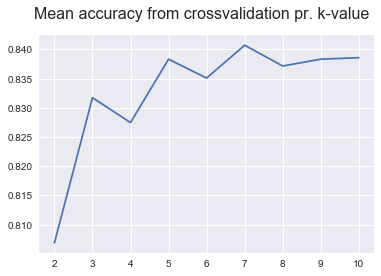

Accuracy on test set: 0.8201550387596899 


In [241]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

bestAccuracy = 0
bestKvalue = 0
kValues = list(range(2,11))
accuracies={}
for kValue in kValues:
    clf = KNeighborsClassifier(n_neighbors=kValue)
    # Cross validation if 3-fold by default.
    # Therefore, three accuracies are returned, and we use the mean to evaluate the model performance
    acc = cross_val_score(clf, X_train_scaled, c_train).mean()
    if acc > bestAccuracy:
        bestAccuracy = acc
        bestKvalue = kValue
    accuracies[kValue] = acc
print("Best (mean) acc on found in the cross-val : {} ".format(bestAccuracy)) 
print("Best-value: {} ".format(bestKvalue))

plt.plot(range(len(accuracies)), list(accuracies.values()))
plt.xticks(range(len(accuracies)), list(accuracies.keys()))
plt.suptitle('Mean accuracy from crossvalidation pr. k-value', fontsize=16)
plt.show()

# Evaluating the accuracy on the test-set
clf = KNeighborsClassifier(n_neighbors=bestKvalue)
clf.fit(X_train_scaled, c_train)
print("Accuracy on test set: {} ".format(clf.score(X_test_scaled,c_test))) 



Looks like a k-value of 7 is the optimal choice.<br>
Just for fun, lets see if sklearn´s GridSearchCV class gives the same result, double checking that our semi-manual logic works.

In [131]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(2,11))}
gs=GridSearchCV(KNeighborsClassifier(),params)
gs.fit(X_train_scaled, c_train)
print("Accuracy on test set: {} ".format(gs.score(X_test_scaled,c_test))) 
print("Best parameters: {} ".format(gs.best_params_))

Accuracy on test set: 0.8201550387596899 
Best parameters: {'n_neighbors': 7} 


The KNN algorithm works on calculating distances, which can be done in several ways. Lets just try two different distance metrics<br>
* "Euclidean" : (sqrt(sum((x - y)^2))) and 
* "Manhattan" : (sum(|x - y|)) 

along with the standard one 
* "Minkowski" : (sum(|x - y|^p)^(1/p))

In [132]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(2,11)), 'metric':['euclidean',
                                                     'manhattan',
                                                     'minkowski']}

gs=GridSearchCV(KNeighborsClassifier(),params, verbose=1)
gs.fit(X_train_scaled, c_train)

print("Accuracy on test set: {} ".format(gs.score(X_test_scaled,c_test))) 
print("Best parameters: {} ".format(gs.best_params_))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   30.7s finished


Accuracy on test set: 0.8271317829457364 
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9} 


So, it seems that we can get a little higher accuracy, by using the Manhattan distance metric for the KNN algorithm

### Visualizing a bit...
Lets do some further visualizations to get a sense of data, before building more models. Since the next model - the Naive Bayes - presumes that features are independent, we´ll do a scatterplot of feature combinations to see, if any of them look correlated<br><br>
For this, lets build a Pandas Dataframe, since Pandas have a nice scatterplot function:

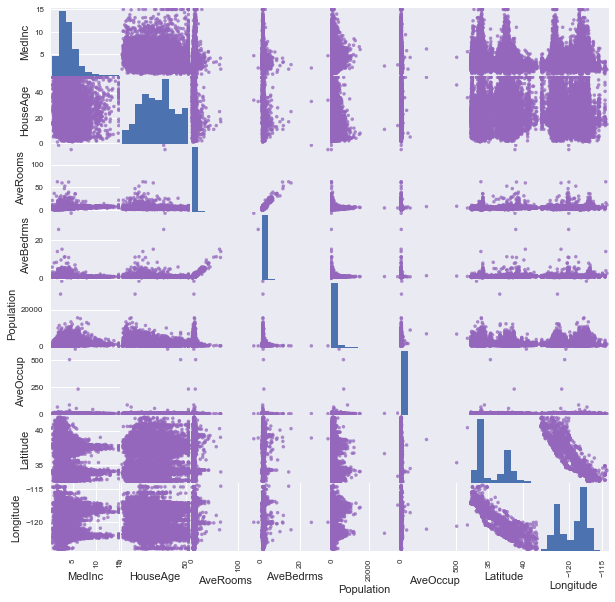

In [242]:
# Just playing around with some colors - these are "Tableau" colors as RGB codes
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

from pandas.plotting import scatter_matrix
housingDataPD = pd.DataFrame(X_train, columns=data.feature_names)
myScatterplot = pd.plotting.scatter_matrix(housingDataPD, 
                                           figsize=(10,10), 
                                           c=tableau20[8], 
                                           alpha=0.75)
plt.show()

Looks like AveBedrms and AveRooms are strongly correlated - lets look a little bit into this, by plotting them by them selves and finding a more trusworthy indicator of correlation, that just eyesight - the pearson correlation coefficient:

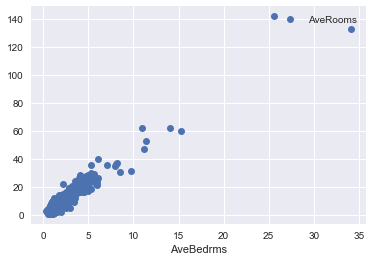

Correlation coefficient (pearsons): 0.8552026590798474 


In [134]:
import numpy
plot = housingDataPD.plot(x='AveBedrms', y='AveRooms', style='o')
plot.plot()
plt.show()

correlation = housingDataPD['AveBedrms'].corr(housingDataPD['AveRooms'])
print("Correlation coefficient (pearsons): {} ".format(correlation))

Actually, it does look like these two variables are correlated, and we should look deeper into wether or not this affects the performance of the model. Howeever, we will let that be for now, because we will revisit the issue in just a moment.

### Naive Bayes

* Classify the instances in the test set using the naive Bayes model.
* The naive Bayes classifier makes the strong assumption that the attributes are conditionally independent given the class variable. Can you identify any pairs of attributes that do not adhere to this assumption, and how does it affect the performance of the classifier if one of the attributes are removed?

Lets train the mode and see how good an accuracy we will get

In [135]:
# Classifying using the Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, c_train)
print("Accuracy score: {}".format(nb.score(X_test, c_test)))

Accuracy score: 0.743798449612403


It looks like the Naive Bayes algorithm performs worse than the KNN with scaled input, getting a accuracy of .74<br>
Now, back to the correlation issue:

In [282]:
#Lets check the correlation between features in the dataset
housingDataPD.corr().abs()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,0.121218,0.318344,0.060920,0.007218,0.001713,0.085855,0.010443
HouseAge,0.121218,1.000000,0.145134,0.069198,0.298695,0.012809,0.017404,0.113763
AveRooms,0.318344,0.145134,1.000000,0.855203,0.067163,0.003653,0.097989,0.021817
AveBedrms,0.060920,0.069198,0.855203,1.000000,0.060250,0.003184,0.065765,0.013538
Population,0.007218,0.298695,0.067163,0.060250,1.000000,0.073333,0.116536,0.106268
AveOccup,0.001713,0.012809,0.003653,0.003184,0.073333,1.000000,0.004018,0.013045
Latitude,0.085855,0.017404,0.097989,0.065765,0.116536,0.004018,1.000000,0.925081
Longitude,0.010443,0.113763,0.021817,0.013538,0.106268,0.013045,0.925081,1.000000


Looking at the above correlation matrix, we can see, that AveRooms and AveBedrooms are relativly strongly correlated (corr.coef = 0.86). However, a matrix of numbers is not that friendly to look at, so lets turn this into a heatmap and look for relationships in the darker colors, which indicates correlations coefficients close to 1 or minus 1. Since we don´t care if the coefficient is positive or negative in this case, lets look at absolute values only and cut away one side of the heatmap.

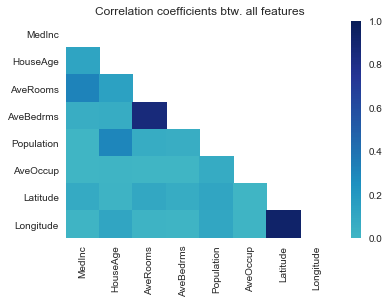

In [244]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
# Set the mask to turn the top side into white
mask = np.zeros_like(housingDataPD.corr())
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(housingDataPD.corr().abs(), 
                     mask=mask, 
                     vmin=0, 
                     vmax=1, 
                     center = 0, 
                     cmap="YlGnBu")
    
    ax.set_title('Correlation coefficients btw. all features')
plt.show()
    
    

It looks like there are two pairs of variables, that are closely correlated:
Longitude/lattitude and AveRooms/AveBedrooms. The first relationship must mean, that the housing area must have a shape that is somewhat diagonal to parallels and meridians. Lets just plot them against eachother:

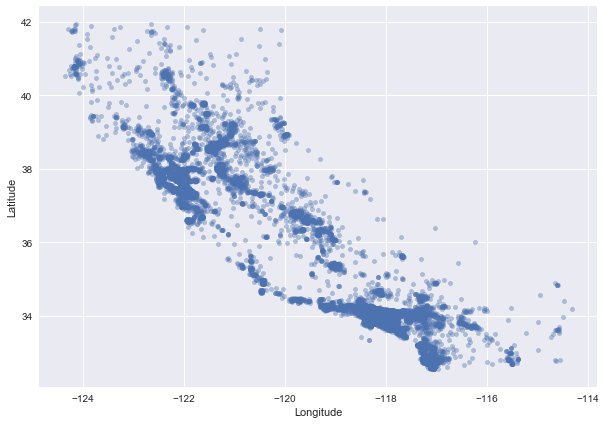

In [245]:
housingDataPD.plot(kind="scatter", 
                   x="Longitude", 
                   y="Latitude", 
                   alpha=0.4, 
                   figsize=(10,7),)

plt.legend()
plt.show()


Actually, if you think about it, this dataset describes housing in California, and if you look at a map of the USA, you will find, that California actually has this exact shape across the lines (lat/long)<br><br>
Since the Naive Bayes model asumes independent variables, lets remove one of the variables in the two identified pairs (Latitude and AveBedrms) and see, if this has any impact on model performance:

In [246]:
housingDataPDNew = housingDataPD.drop(['Latitude','AveBedrms'],axis=1)
# Printing out the dataset to see the new "shape"
housingDataPDNew[:4]


,MedInc,HouseAge,AveRooms,Population,AveOccup,Longitude
0,7.3003,19.0,7.961600,1926.0,3.081600,-122.68
1,5.9547,18.0,6.547325,547.0,2.251029,-117.24
2,3.2125,19.0,5.207547,314.0,2.962264,-118.27
3,6.9930,13.0,6.428571,120.0,2.857143,-117.18


In [143]:
# Fitting from the new "slimmer" dataset
nbNew=GaussianNB().fit(housingDataPDNew, c_train)
print("Accuracy score before removal: {}".format(nb.score(X_test,c_test)))
print("Accuracy score after removal : {}".format(nbNew.score(housingDataPDNew,c_train)))


Accuracy score before removal: 0.743798449612403
Accuracy score after removal : 0.7483850129198967


As seen above, it doesn´t make that much difference, but in fact the model performance did improve a little bit. 
0.7437->.7483


### Model comparison

* Using the results obtained above, classify the instances in the test set using the k-NN classifier, the naive Bayes classifier, and decision trees.
* Based on your intuitive understanding of the classifiers, can you explain their relative performance? 

So, we already classified the instances in the test-set using the kNN and the Bayes. Let´s try searching for a decision tree:

In [144]:
from sklearn.tree import DecisionTreeClassifier
params = {'min_samples_split':list(range(2,50)), 
          'max_depth': list(range(1,10)), 
          'min_samples_leaf':list(range(1,50))}
gsTree=GridSearchCV(DecisionTreeClassifier(),params)
gsTree.fit(X_train, c_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='war

In [247]:
print("Accuracy score KNN          : {} ".format(gs.score(X_test_scaled, c_test))) 
print("Accuracy score NB           : {}".format(nbNew.score(housingDataPDNew, c_train)))
print("Accuracy score DecisionTree : {}".format(gsTree.score(X_train, c_train)))

Accuracy score KNN          : 0.8271317829457364 
Accuracy score NB           : 0.7483850129198967
Accuracy score DecisionTree : 0.8810723514211887


### Comparing the three algorithms for this particular problem: <br>
#### K Nearest Neighbor
The K-Nearest Neighbor classifier does what it sais on the box - it classifies a unknown instance on the basis of the closest neighbors in the multi dimensional space. That also means, that all variables have the same weight in the classification (provided that features are scaled), eg. location is just as important as the age of the housing. This is contracdictory to the common "Location, location, location" saying, which basically means, that location is the most important factor for price. <br><br> Lets play around with this saying for a moment. Lets try eliminating all other predictive variables than location (lat/long) and see if this can improve the KNN model - lets only look at the real-life "nearest neighbors" :-)

Scaling should probably be used, since lat and long are not on the same scale.


In [354]:
housingDataJustLatitudeLongitude = housingDataPD[['Latitude','Longitude']]

# Printing out the dataset to see the new "shape"
housingDataJustLatitudeLongitude[:4]
X_test_lat_long = X_test[:,[data.feature_names.index('Latitude'),
                            data.feature_names.index('Longitude')]]

params = {'n_neighbors':list(range(2,11))}
gs=GridSearchCV(KNeighborsClassifier(),params)
gs.fit(housingDataJustLatitudeLongitude, c_train)

print("Accuracy on test set: {} ".format(gs.score(X_test_lat_long, c_test))) 

Accuracy on test set: 0.8893410852713178 


This increases the performance dramatically, and underlines the fact, that variables without real predictive power actually just becomes noise in the algorithm<br>
#### (Gaussian) Naive Bayes 
So, the KNN just beat all other algorithms when isolating the location variables. Funny enough, we tried removing one of these variables when playing around with the NB algorithm. We did that, because they seemed to be very strictly co-related, and it did help the result a little bit. With the hypothesis of "location, location, location" it seems strange, that it improved the result, since the "problem" with using co-related variables in the NB algorithm is, that too much weight would be put on the "location" variable. However, it seems, that another fact comes into play here, and that is the assumption of "normal" (or "Gaussian") distributed variables. Lets take a closer look at the variable distributions:

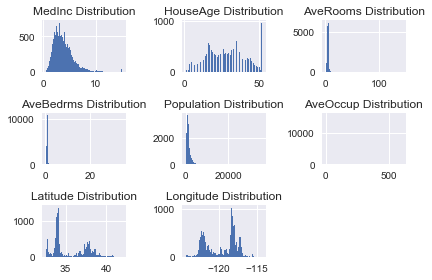

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=100,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(housingDataPD, data.feature_names, 3, 3)

As seen from the above illustration, several of the variables seem to have other distributions, which might throw the algorithm off. This might be one of the reasons why we do not obtain greater accuracy using the Naive Bayes approach

### Decision tree
The decision tree was quite close to the KNN (with only lat/long features), so could it be, that the tree actually also found the most important features for predicting housing prices to be lat/long ? Lets see:

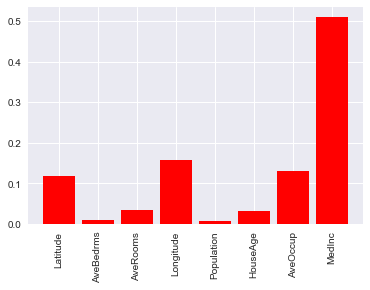

In [149]:
tree5=DecisionTreeClassifier(**gsTree.best_params_).fit(X_train, c_train)
important_features_dict = {}
for x,i in enumerate(tree5.feature_importances_):
    important_features_dict[data.feature_names[x]]=i

plt.bar(range(len(important_features_dict)), 
        list(important_features_dict.values()), 
        align='center', color='red')

plt.xticks(range(len(important_features_dict)), 
           list(important_features_dict.keys()), 
           rotation='vertical')
plt.show()

No, actually it finds, that the "Median Income" is the most important one. It seems, that feature selection methods could come in handy here. Now, we could go back to the KNN and feed it a dataset with only the most important variables from the decision tree, but that would bring us into "feature selection", which is out-of-scope for this exercise.

# Exercise Sheet 3

In this exercise we perform character recognition using SVM and NN classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [321]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./Data/mnist')

The data has .data and .target attributes. The following gives us some basic information on the data:

In [154]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]



We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  46 105 254 254 254 254 255 239  41
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  37
 118 222 254 253 253 253 253 253 253 211  54   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  14 200 253 253 254 253 253 253 253 253
 253 253 116   0   0   0   0   0   0   0   0   0   0   0   0   0  16 160
 236 253 253 253 254 253 

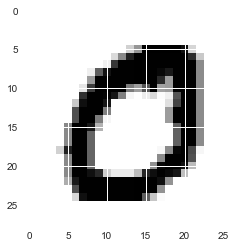

In [155]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index]))
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



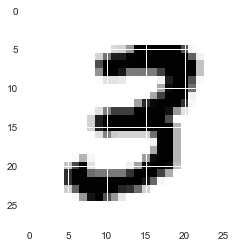

[ 3.  3.  3. ...,  7.  7.  7.]


In [156]:
digit0=3
digit1=7
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,
                                        mnist.target==digit1)]

mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,
                                            mnist.target==digit1)]

print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 1:** Split the mnist_bin data into training and test set. Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. *Caution*: for some configurations, learning here can take a little while (several minutes).
<br>Ok

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [157]:
    X_train, X_test, c_train, c_test = train_test_split(mnist_bin_data, 
                                                        mnist_bin_target, 
                                                        random_state=0)
    
    print("Train data (instances/features): "+str(X_train.shape))
    print("Test data  (instances/features): "+str(X_test.shape))

Train data (instances/features): (10825, 784)
Test data  (instances/features): (3609, 784)


### SVM 
First, lets try finding a good SVM on this problem. We will try out different kernel-functions (more on that later) and see how they affect learning times.

In [11]:
import datetime
from collections import defaultdict
# We will implement this as a function taking training and test data 
# as arguments because we will used again later
# This function tries four different kernels and prints out trainingtime 
# and accuracy for each
def trySVMs(Xtrain, ctrain, Xtest, ctest):
    processTimes = defaultdict(list)
    processTimes={'linear':[], 'rbf':[], 'poly':[], 'sigmoid':[]}
    for k in ['linear', 'rbf','poly','sigmoid']:
        start = datetime.datetime.now()
        svm=SVC(kernel=k, gamma=1.0).fit(Xtrain, ctrain)
        end = datetime.datetime.now()
        processTimes[k].append([svm.score(Xtest,ctest),(end-start).seconds])  
        item=processTimes[k]
        print("Done: "+k+" in "+str((end-start).seconds)
              +" seconds with accuracy: "+str(item[0][0]))
    #print(processTimes)
trySVMs(X_train, c_train, X_test, c_test)

Done: linear in 0 seconds with accuracy: 0.998376184032
Done: rbf in 277 seconds with accuracy: 0.537753721245
Done: poly in 1 seconds with accuracy: 0.997834912043
Done: sigmoid in 43278 seconds with accuracy: 0.537753721245


Looks like the kernel funcktion has relatively large impact on learning times - lets plot them se get a better sense of the issue:

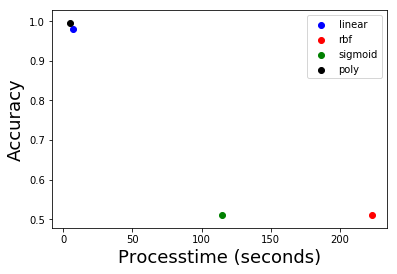

,linear,poly,rbf,sigmoid
0,"[0.981435300637, 7]","[0.995289553893, 5]","[0.510667775007, 223]","[0.510667775007, 115]"


In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd
colors={'rbf':'red','linear':'blue','poly':'black', 'sigmoid':'green'}
for kernel, value in processTimes.items():
    x=[]
    y=[]
    for item in value:
        x.append(item[1])
        y.append(item[0])
        plt.scatter(x,y, color=colors[kernel], label=kernel)
#plt.ylim(0, 1)
plt.legend()
plt.xlabel('Processtime (seconds)', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

df = pd.DataFrame(processTimes)
df

# Why is rbf and sigmoid excactly the same acc ?

Not only is the choice of kernel-function important for the time it takes to learn a classifier, it also has hign impact on the accuracy.<br>
Lets try a neural network and see, if network structure has an impact on accuracy and learning times:

In [159]:
from sklearn.neural_network import MLPClassifier
from collections import defaultdict
accuracies={}
layers=[1,2,5,10]
nodes=[10,20,50,100]
#accuracies = {}
accuracies = defaultdict(list)

# Start with perceptron
# Compare with the linear SVM
i=0
for layer in layers:
    start = datetime.datetime.now()
    
    mlp = MLPClassifier(hidden_layer_sizes=[layer, 
                                            nodes[i]],
                        activation='relu', 
                        solver='lbfgs', 
                        random_state=0).fit(X_train, c_train)
    
    end = datetime.datetime.now()  
    acc=mlp.score(X_test, c_test)
    key=str(layer)+"/"+str(nodes[i])
    print("Accuracy on test set ("+key+": {} ".format(acc)) 
    accuracies[str(layer)+"/"+str(nodes[i])] = (acc,(end-start).seconds)
    i+=1
    #print(key)
#print(accuracies)




Accuracy on test set (1/10: 0.5106677750069272 
Accuracy on test set (2/20: 0.5106677750069272 
Accuracy on test set (5/50: 0.9853144915489055 
Accuracy on test set (10/100: 0.9903020227209753 


We´ll plot the network structures below to see how they perform, measured be accuracy and learning time.

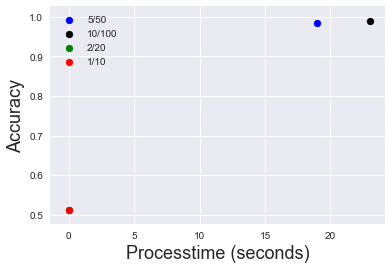

,1/10,10/100,2/20,5/50
0,0.510668,0.990302,0.510668,0.985314
1,0.000000,23.000000,0.000000,19.000000


In [160]:
##
colors={'1/10':'red','2/20':'green','5/50':'blue', '10/100':'black'}
for structure, performances in accuracies.items():
    x=[]
    y=[]
    #for item in value:
    x.append(performances[1])
    y.append(performances[0])
    plt.scatter(x,y, color=colors[structure], label=structure)
#plt.ylim(0, 1)
plt.legend()
plt.xlabel('Processtime (seconds)', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

df = pd.DataFrame(accuracies)
df

As can be seen, also the Neural Net is quite sensitive to the chosen network structure - it seems, that in this case the accuracy grows with the complexity of the network, but so does the learning time.<br>
<br>Now, we´ve been finding optimal parameters semi-manually - just for the fun of it, lets see, if GridsearchCV agrees with us in choosing the best configuration. We do expect this to give us a slightly different accuracy score, since it runs cross-validation instead of the test/train approach above, but it should come up with the same best configuration. Also, the accuracy should be a bit more generalizable and it will show  more compact way of finding best parameters:

In [15]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes':[[1,10],[2,20],[5,50],[10,100]]}
mlp = MLPClassifier(activation='relu', solver='lbfgs', random_state=0)
gsMlp=GridSearchCV(mlp,params).fit(X_train, c_train)
print("Accuracy on test set: {} ".format(gsMlp.score(X_test, c_test))) 
print("Best parameters: {} ".format(gsMlp.best_params_))

Accuracy on test set: 0.9891936824605154 
Best parameters: {'hidden_layer_sizes': [10, 100]} 


The MLPClassifier also has a solver parameter. In short, the solver is the method the algorithm uses to search for the minimum error when backpropagating for optimizing weights and measures in the learning process. So, lets see if this has any impact on the performance. We already worked with lbfsg, so lets try the two others that the scikit MLPClassifier supports - sgd (Stocastic Gradient Descend) and adam.

In [161]:
params = {'solver':['sgd','adam']}
mlp = MLPClassifier(activation='relu', random_state=0)
gsMlp=GridSearchCV(mlp,params).fit(X_train, c_train)
print("Accuracy on test set: {} ".format(gsMlp.score(X_test, c_test))) 
print("Best parameters: {} ".format(gsMlp.best_params_))

Accuracy on test set: 0.9936270435023552 
Best parameters: {'solver': 'sgd'} 


In [162]:
predictions = gsMlp.predict(X_test)

Actually, that improved the accuracy to be almost perfect on the testset<br>
Lets take a look at some of the incorrectly classified instances - some of them look pretty weird. We have intentionally tried to find some, that are particularly strange, which was a quite easy process, since there are not that many to choose from - given the accuracy of the model.

Number of incorrect classifications: 23


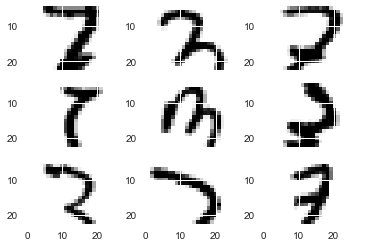

In [174]:
# To do: Plot these a little more elegantly
misclassifications = X_test[c_test != predictions]
print("Number of incorrect classifications: "+str(misclassifications.shape[0]))
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True)   
axes[0, 0].imshow(misclassifications[9].reshape(28,28),cmap=plt.cm.gray_r)
axes[1, 0].imshow(misclassifications[10].reshape(28,28),cmap=plt.cm.gray_r)
axes[2, 0].imshow(misclassifications[20].reshape(28,28),cmap=plt.cm.gray_r)
axes[0, 1].imshow(misclassifications[12].reshape(28,28),cmap=plt.cm.gray_r)
axes[1, 1].imshow(misclassifications[13].reshape(28,28),cmap=plt.cm.gray_r)
axes[2, 1].imshow(misclassifications[14].reshape(28,28),cmap=plt.cm.gray_r)
axes[0, 2].imshow(misclassifications[22].reshape(28,28),cmap=plt.cm.gray_r)
axes[1, 2].imshow(misclassifications[16].reshape(28,28),cmap=plt.cm.gray_r)
axes[2, 2].imshow(misclassifications[17].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

Lets compare with some of the correctly classified to see, if it makes sense:

Number of correct classifications: 3586


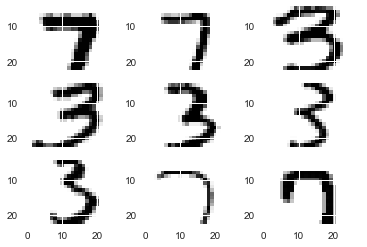

In [183]:
correctClassifications = X_test[c_test == predictions]
print("Number of correct classifications: "+str(correctClassifications.shape[0]))
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True)   
axes[0, 0].imshow(correctClassifications[400].reshape(28,28),cmap=plt.cm.gray_r)
axes[1, 0].imshow(correctClassifications[800].reshape(28,28),cmap=plt.cm.gray_r)
axes[2, 0].imshow(correctClassifications[1200].reshape(28,28),cmap=plt.cm.gray_r)
axes[0, 1].imshow(correctClassifications[1600].reshape(28,28),cmap=plt.cm.gray_r)
axes[1, 1].imshow(correctClassifications[2000].reshape(28,28),cmap=plt.cm.gray_r)
axes[2, 1].imshow(correctClassifications[2400].reshape(28,28),cmap=plt.cm.gray_r)
axes[0, 2].imshow(correctClassifications[2800].reshape(28,28),cmap=plt.cm.gray_r)
axes[1, 2].imshow(correctClassifications[3200].reshape(28,28),cmap=plt.cm.gray_r)
axes[2, 2].imshow(correctClassifications[3585].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

Some of the misclassified examples are not even human readable, and some of them can be read, but you can understand why they don´t look like the typical digits - f.eks. then number three is in one case almost written vertically. On the other hand, all examples of correctly classified digits can be read and identified quite unambiguously.<br><br>
Now, having found optimal parameters for the NN algorithm, lets see how it does on the full dataset:

In [372]:
X_train, X_test, c_train, c_test = train_test_split(mnist.data,mnist.target,random_state=0)
mlp = MLPClassifier(activation='relu', 
                    solver='sgd', 
                    random_state=0, 
                    hidden_layer_sizes=[100,100]).fit(X_train, c_train)

print("Accuracy on test set: {} ".format(mlp.score(X_test, c_test))) 

Accuracy on test set: 0.9354857142857143 


To our surprise, the accuracy suddently went down dramatically, which means, that what is a good configuration of the network to classify two digits, is not automatically a good configuration for all ten digits. Still, if you were to blindly guess, you would have an accuracy of 1/10, so atleast the model does better than "chance". Lets investigate a little more into what goes wrong: 


[[1597    0    7    1    3    3    9    6   11    0]
 [   1 1977   14    6    1    3    0   11   17    4]
 [  17    5 1596    8   15    4   12   11   25    2]
 [   3    5   48 1589    1   39    4   10   29   13]
 [   3    6    5    2 1609    2   16    8   10   51]
 [  10    1   11   54    2 1479   16    5   22   17]
 [  12    3   10    0   16   33 1637    0   22    0]
 [  11    1   17   17   20    4    0 1710    4   41]
 [   8   13   33   22    7   40   12    7 1599   16]
 [  13    5    5   21   54   12    2   36   23 1578]]


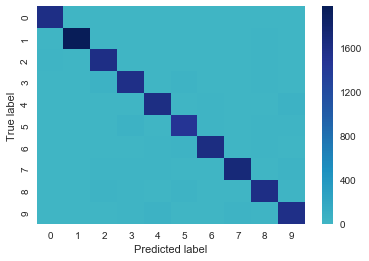

In [373]:
from sklearn.metrics import confusion_matrix
from mglearn.tools import *
import itertools
print()
prd=mlp.predict(X_test)
cnf = confusion_matrix(c_test,prd)

with sns.axes_style("white"):
    ax = sns.heatmap(cnf,
                     center = 0, 
                     cmap="YlGnBu")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(cnf)
plt.show()


From the above confusion matrix we can see, that zero´s and to some extend one´s can be recognized, but it also seems, that distinguishing between 10 digits rather than two is a much harder task.

Now, lets see how a more easy task affects the accuracy and process time:

In [378]:
# Lets make a new dataset with other digits:
digit0=0
digit1=1
mnist_bin_data_new=mnist.data[np.logical_or(mnist.target==digit0,
                                            mnist.target==digit1)]

mnist_bin_target_new=mnist.target[np.logical_or(mnist.target==digit0,
                                                mnist.target==digit1)]

X_train_new, X_test_new, c_train_new, c_test_new = train_test_split(mnist_bin_data_new, 
                                                                    mnist_bin_target_new, 
                                                                    random_state=0)
trySVMs(X_train_new, c_train_new, X_test_new, c_test_new)

Done: linear in 1 seconds with accuracy: 0.998376184032
Done: rbf in 281 seconds with accuracy: 0.537753721245
Done: poly in 1 seconds with accuracy: 0.997834912043
Done: sigmoid in 106 seconds with accuracy: 0.537753721245


We next investigate the capability of the different learning approaches to find a good model, knowing that a very accurate model exists. For this, we add a 'cheat column' to our data: we add an additional column to the data matrix that simply contains a 0/1 encoding of the actual class label: 

In [376]:
cheatcol=np.array(mnist_bin_target_new) #making a copy of the original target array
cheatcol[cheatcol==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol[cheatcol==digit1]=1
#getting the dimensions right for the following .hstack operation to work ... 
cheatcol=np.reshape(cheatcol,[mnist_bin_data_new.shape[0],1]) 
#appending the new column
mnist_bin_data_cheat = np.hstack((mnist_bin_data_new,cheatcol))

# Show me the first example where #785 is 1:
i=0
lst=[]
for data in mnist_bin_data_cheat:
    if data[784]==1:
        lst.append(i)        
    i+=1
#mnist_bin_data_cheat[lst[1]]

All our candidate model types now are able, in principle, to construct a 100% accurate classifier for this data: we only have to 'learn' that only the last column in the data matters, and we can predict 'digit0' if we find a 0 in the last column and 'digit1' if we find a 1. All our SVM or NN network models would in principle be able to do just this, through a suitable setting of the SVM coefficients, respectively the NN weights.

**Exercise 2:** Describe, briefly, how the coefficients and weights of an SVM and NN model (with arbitrary number of layers) would have to be set, so that the resulting model is 100% accurate on this cheating data. Investigate how the accuracy of different SVM and NN classifiers improves in practice on this new dataset. Do you achieve 100% accuracy on the test set? If not, try to change the encoding in the cheat column: instead of representing digit1 with a 1, use a larger number, e.g. 250. Does that help? Why?


### Setting the weights and biases of a NN for a "perfect model"
For a neural network, finding the most is important feature is not very intuitive. All combinations of all features does in principle count when classifying, only the combined weights and biases of different nodes (connections) controls the classification. So, if we want to tune the network to classify, knowing that there is one really important feature (the cheat column), the aim would be to optimize the weights and biases in the neurons so that they would "fire" (or activate) when the value in the cheat column corresponding to a given digit is seen.

Fx, considering the simple single layer perceptron, in the neuron associated with the classification "1" on our cheat-dataset the weight an biases (w and b) would have to be set so that it activates when 1 is seen in the cheet-column. One example would be the below depicted, where feature 785 is out cheat column. As seen, the weights and biases are set in such a way, that it activates when 1 is seen in the cheet-column and does not activate when 0 is seen. Note, that the weights and biases are the same in the two examples, because the neuron has already been training (weights and biases have been set):


<img src="./images/neuron_activation.png">

#### 1 is seen:
<br>
<img src="neuron_activation_example_1_is_seen.png" width=70% hight=70% >
<br><br>

#### 0 is seen
<br>
<img src="neuron_activation_example_0_is_seen.png"  width=70% hight=70% >
<br>

Training the network is done in iterations, and the more iterations for each training instance (and backprobagation of weights and biases), the more "accurate" the model would become on the training data, eg. turning down weights and biases on non-important features. Again, normally this is something that you would be very carefull doing, because it would increase the risk of overfitting the model to the training data, but in this artificial case, we presume that the information exists in future unseen instances as well.<br><br>
Generally, the weigths would have to be set very small on all other features for them not to be considered in practise.

Also, the size of the network determines the "memory" of the network, thus creating a bigger network enables it to capture more "subtle" connections (eg. combinations of features with weights and biases), however, this also increases the risk of overfitting, since a big enough network would in reality be able to "remember" all training data. So, this is also something that we would be carefull doing without considering (and testing) overfitting.


In [113]:
cheatcol=np.array(mnist_bin_target_new) #making a copy of the original target array
cheatcol[cheatcol==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol[cheatcol==digit1]=1
cheatcol=np.reshape(cheatcol,[mnist_bin_data_new.shape[0],1]) #getting the dimensions right for the following .hstack operation to work ... 
mnist_bin_data_cheat = np.hstack((mnist_bin_data_new,cheatcol)) #appending the new column
X_train, X_test, c_train, c_test = train_test_split(mnist_bin_data_cheat,
                                                    mnist_bin_target_new, 
                                                    random_state=0)

start = datetime.datetime.now()
mlp = MLPClassifier(activation='relu', 
                    solver='lbfgs', 
                    random_state=0).fit(X_train, c_train)

end = datetime.datetime.now()
print("Accuracy on training set: {} ".format(mlp.score(X_train, c_train))) 
print("Accuracy on test set: {} ".format(mlp.score(X_test, c_test))) 
print("Training took {} seconds ".format((end-start).seconds))

Accuracy on training set: 1.0 
Accuracy on test set: 0.9983761840324763 
Training took 1 seconds 


Thats it - we have an accuracy on 100% on the trainingset. 
However, we did not obtain 100% accuracy on the testset, which means, that we have not obtained the optimal weights and biases as descibed - there must still be some influence from the other features and there must be a few examples where these features end up weighing more than out "cheat-feature". 

### Lets try the SVM:

The C parameter controls the tradeoff between accurate decision-boundries and how generalizable the boundry will be.
Fx, a very high value of C would result in a very accurate decisionboundry on the training data, but would probably lead to overfitting.
So, in this experiment we are aiming at a very accurate model (we know that it actually exists) at the (possible) expence of not being able to generalize it very well


In [195]:
cheatcol=np.array(mnist_bin_target_new) #making a copy of the original target array
cheatcol[cheatcol==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol[cheatcol==digit1]=1
#getting the dimensions right for the following .hstack operation to work ... 
cheatcol=np.reshape(cheatcol,[mnist_bin_data_new.shape[0],1]) 
 #appending the new column
mnist_bin_data_cheat = np.hstack((mnist_bin_data_new,cheatcol))
X_train, X_test, c_train, c_test = train_test_split(mnist_bin_data_cheat, 
                                                    mnist_bin_target_new, 
                                                    random_state=0)

params={'C':[1,5,10,100]}
#Choosing a poly kernel, as we saw earlier, since this was the best 
# performing on the problem
start = datetime.datetime.now()
svm=SVC(kernel='poly', gamma=1.0)
gsSvm=GridSearchCV(svm,params).fit(X_train, c_train)
end = datetime.datetime.now()
print("Accuracy on training set: {} ".format(gsSvm.score(X_train, c_train))) 
print("Accuracy on test set: {} ".format(gsSvm.score(X_test, c_test))) 
#print("Best parameters: {} ".format(svm.best_params_))
print("Training took {} seconds ".format((end-start).seconds))
print("Optimal parameters: "+str(gsSvm.best_params_))



Accuracy on training set: 1.0 
Accuracy on test set: 0.9978349120433018 
Training took 28 seconds 
Optimal parameters: {'C': 1}


Well, the C parameter did not seem to have any effect, although we did reach a 100% accuracy on the trainingset. It is quite obvious, that we cannot improve this very much using this technique, since we have alrady reached an perfect accuracy on the trainingset - even with cross-validation. No further searchin would result in better parameters, since they are already "perfect.

In theory, the coefficient would have to be set like with the NN, with very small weights on the features that "do not matter", eg. all other than the cheat feature. In the below 2D example, the X feature has all the separating power while the Y feature has none. In this case, all the weight is put on the X feature, which in our example would correspond to the cheat-feature.
<br> <img src="2d support vector machine.png" align='left'>

### Scaling
Now, lets see if it has any effect changing the "1" cheating-feature to "250". This should illustrate, if any of the two algorithms are sensitive to scaling

In [370]:
cheatcol=np.array(mnist_bin_target_new) #making a copy of the original target array
cheatcol[cheatcol==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol[cheatcol==digit1]=250
#getting the dimensions right for the following .hstack operation to work ... 
cheatcol=np.reshape(cheatcol,[mnist_bin_data_new.shape[0],1]) 
#appending the new column
mnist_bin_data_cheat = np.hstack((mnist_bin_data_new,cheatcol)) 
X_train, X_test, c_train, c_test = train_test_split(mnist_bin_data_cheat, 
                                                    mnist_bin_target_new, 
                                                    random_state=0)

start = datetime.datetime.now()
mlp = MLPClassifier(activation='tanh', 
                    solver='lbfgs', 
                    alpha=10,
                    random_state=0).fit(X_train, c_train)

end = datetime.datetime.now()
print("Accuracy on training set: {} ".format(mlp.score(X_train, c_train))) 
print("Accuracy on test set: {} ".format(mlp.score(X_test, c_test))) 
print("Training took {} seconds ".format((end-start).seconds))


Accuracy on training set: 0.9994587280108255 
Accuracy on test set: 0.9989174560216508 
Training took 24 seconds 


It seems, that in this case, the scaling does not matter for the MLP algorithm. Although the algorithm trains a model that relies on actual numerical values, the scaling is counteracted by the weights and biases of each feature, so in reality, it does not matter. However, since we do know, that the MLP algorithm must be sensitive to some extend to scaling, lets try going to the extreme, at set the "1"-digit indicator to 2500 (250x10). This way, we should be able to force the algorithm to be very much dependent on this last feature:

In [130]:
cheatcol=np.array(mnist_bin_target_new) #making a copy of the original target array
cheatcol[cheatcol==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol[cheatcol==digit1]=2500
#getting the dimensions right for the following .hstack operation to work ... 
cheatcol=np.reshape(cheatcol,[mnist_bin_data_new.shape[0],1]) 
 #appending the new column
mnist_bin_data_cheat = np.hstack((mnist_bin_data_new,cheatcol))
X_train, X_test, c_train, c_test = train_test_split(mnist_bin_data_cheat, 
                                                    mnist_bin_target_new, 
                                                    random_state=0)

start = datetime.datetime.now()
mlp = MLPClassifier(activation='relu', 
                    solver='lbfgs', 
                    random_state=0).fit(X_train, c_train)
end = datetime.datetime.now()
print("Accuracy on training set: {} ".format(mlp.score(X_train, c_train))) 
print("Accuracy on test set: {} ".format(mlp.score(X_test, c_test))) 
print("Training took {} seconds ".format((end-start).seconds))

Accuracy on training set: 1.0 
Accuracy on test set: 1.0 
Training took 1 seconds 


This time it "worked" - the accuracy is now 100% on both sets. However, this illustrates, that scaling should considered, since in reallife cases, we would probably want every feature to be considered equally. Just to illustrate, that the SVM has the same issue, lets repeat the example, now using the SVM:

In [131]:
#Choosing a poly kernel, as we saw earlier, that this was the best performing on the problem
start = datetime.datetime.now()
svm=SVC(kernel='poly', gamma=1.0).fit(X_train, c_train)
end = datetime.datetime.now()
print("Accuracy on training set: {} ".format(svm.score(X_train, c_train))) 
print("Accuracy on test set: {} ".format(svm.score(X_test, c_test))) 
#print("Best parameters: {} ".format(svm.best_params_))
print("Training took {} seconds ".format((end-start).seconds))



Accuracy on training set: 1.0 
Accuracy on test set: 1.0 
Training took 1 seconds 


**Exercise 3:** (Now back to the data without a cheating column!) Suppose you want to design a custom kernel function for the MNIST data that better captures the relevant properties of 'similarity' in this data than the generic 'rbf' or 'poly' kernels. Bear in mind that the data as seen by our classifiers and kernel functions just consists of arrays of length 784. 

Describe one or two ideas for defining such a kernel. You need not show that the kernel you propose actually is positive semi-definite (though as a bonus, you can try to provide some arguments for that). This is a text-only exercise -- no sklearn code required!

If you are really curious, you can implement your kernel as a function, and use it as a custom kernel. See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example of how that is done.

The purpose of kernel functions is map data into a higher dimensional space to obtain linear separation. In this space, the kernel functions serves as a "similarity function", which means it returns a measure of simmilarity of two input vectors. This measure is a vector in itself, thus the kernel function must take two vectors as input and return one vector as output. The simmilarity is the dot product of the two input vectors in some feature space, where data is linearly separable.

<img src="Mapping_data_to_be_lin_sep.png" width=25%> 

The reason, that simmilarity can be used in determining the margins is, that very simmilar vectors that predict different classes tend to maximize the dicision margin.
<img src="simmilarity_maximizes_margin.png" width=25%>

So in short, the custom kernel function then must do the following:<br>
1) Take two vectors as input<br>
2) map data to a higher dimensional space to obtain linear separability<br>
3) calculate and return the dot product of the mapped input vectors, as a measure of simmilarity




## Exercises following the 3rd Seminar

We first use the dataset containing movie reviews from the *Internet Movie Database*. For this, the data first needs to be downloaded from <a href="http://ai.stanford.edu/~amaas/data/sentiment/"> here </a>. Note: this is about 220 Mb.  After uncompressing, the data is contained in a directory `aclImdb` with sub-directories `train` and `test`. In the following, replace the piece of the path that leads to the directory in which you have unpacked the data.

In [75]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [76]:
reviews_train=load_files('/users/janpedersbaek/Code/PycharmProjects/Master i IT/Seminar III/aclImdb/train',categories=['neg','pos'])
reviews_test=load_files('/users/janpedersbaek/Code/PycharmProjects/Master i IT/Seminar III/aclImdb/test',categories=['neg','pos'])
reviews_train.data[1]

#small_mnist_data,small_mnist_label = skl.utils.resample(mnist.data,mnist.target,n_samples=200,replace='false')


b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

The following is the same code as in the `TextData` notebook for transforming the data into term-frequency, and term-frequency-inverse-document-frequency vectors. 

In [251]:
# Note: you could use the tfIdf vectorizer directly, instead of going throug CountVectorizer
## 15804 -> 403 by going from 0.0005 to 0.05
dictionary=CountVectorizer(min_df=0.0005, 
                           max_df=0.5).fit(reviews_train.data)

reviews_train_tf_vec=dictionary.transform(
    reviews_train.data)

reviews_train_tfidf_vec=TfidfTransformer().fit_transform(
    reviews_train_tf_vec)

reviews_test_tf_vec=dictionary.transform(reviews_test.data)

reviews_test_tfidf_vec = TfidfTransformer().fit_transform(
    reviews_test_tf_vec)


In [7]:
len(dictionary.vocabulary_)

15862

**Exercise 4:** Learn at least 2 different kinds of classifiers (k-NN, Naive Bayes, Decision Tree, SVM, Neural Network) for predicting the 'positive' reviews based on the tf or tf-idf vectors. Optimize the classifiers via the available regularization parameters so that overfitting is minimized.  Evaluate the learned classifiers using accuracy, precision, recall, and their ROC curves. 

In [8]:
# Defining function that is used throughout this exercise
# Plot confusion matrix, since we will be doing it multiple times
import matplotlib.pyplot as plt
import itertools
import datetime
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Lets start with the Naive Bayes algorithm

In [39]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
start = datetime.datetime.now()
clfNB=MultinomialNB().fit(reviews_train_tfidf_vec,reviews_train.target)
print("Process took: "+
      str((datetime.datetime.now()-start).seconds)+
      " seconds")

# Note: try cross validation
predicted_nb_train = clfNB.predict(reviews_train_tfidf_vec)
predicted_nb_test = clfNB.predict(reviews_test_tfidf_vec)
print("Accuracy on training dataset: {} ".format(np.mean(predicted_nb_train 
                                                         == reviews_train.target)))

print("Accuracy on test dataset: {} ".format(np.mean(predicted_nb_test 
                                                     == reviews_train.target)))

Process took: 0 seconds
Accuracy on training dataset: 0.88948 
Accuracy on test dataset: 0.8366 


It seems, that we are overfitting somewhat, since the accuracy on the training set is a lot better than on the test-set. The risk of overfitting could come from the presumption of non-correlated features. However, given the nature and number of features of this dataset, the risk is quite small. Correlated words must intuitively be very small compared to the rest of the words (features). Also the use of words in the testset that have not been seen in the trainingset could contribute to the result being lower, but given the size of the trainingset, this should not be that big a problem. 

We can however get a more realistic view on how generalizable the Naive Bayes model is, by doing cross validation.

In [1]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(clfNB, 
                         reviews_train_tfidf_vec, 
                         reviews_train.target, 
                         cv=10, 
                         scoring='accuracy')

print(scores.mean())

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'clfNB' is not defined

Looks like the most accurate estimate of model accuracy is somewhere in between the two previous accuracies on training and test data. We should really trust the crossvalidated score, because it is a better estimate of accuracy on future unseen data.<br><br>
Now, accuracy is not everything. <br>Lets dive a little deeper into the aspects of the binary classification and its "accuracy". Below is plottet a _confusion_ _matrix_

Confusion matrix, without normalization


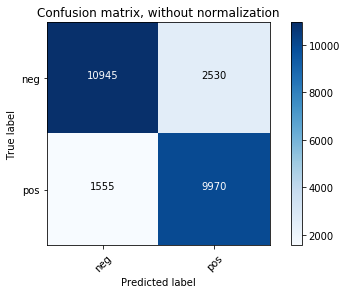

In [10]:
# Create the confusion matrix:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(predicted_nb_test,reviews_test.target)
plot_confusion_matrix(cnf, classes=['neg','pos'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()

Several things can be drawn from this matrix:
### Precision
#### Out of all the positive reviews we found, how many are actually positive ?
Looking at the positive reviews, it can be seen, that number of predicted positive reviews that we found (9970) over the number of actual positive reviews (9970+2530) is 79,76%.<br> This is the measure called _precision_

### Recall
#### Out of all the positive reviews, how many did we find ?
We can see from the matrix, that there were 11.525 positive reviews (9970+1555) and the model successfully found 9970 of them, which corresponds to 86.51%<br> This measure is called _recall_

Now, lets say, that is is more important to find all the positive reviews at the expense of falsely including some of the negative reviews, how could this tradeoff be visualized ? This is where the ROC curve comes into play, as it does excactly that: plots true positive rate against false positive rate: 

Accuracy on training dataset: 0.88948 
Accuracy on test dataset: 0.8366 
Area under curve (rbf): 
0.9164159936


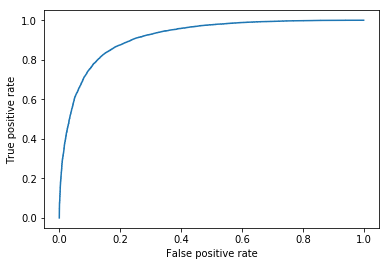

In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

print("Accuracy on training dataset: {} ".format(np.mean(predicted_nb_train 
                                                         == reviews_train.target)))

print("Accuracy on test dataset: {} ".format(np.mean(predicted_nb_test 
                                                     == reviews_test.target)))

from sklearn import metrics
preds = clfNB.predict_proba(reviews_test_tfidf_vec)[:,1]
fprNB, tprNB, threshold = metrics.roc_curve(reviews_test.target, preds)

plt.plot(fprNB,tprNB)
print("Area under curve (rbf): \n{}".format(roc_auc_score(reviews_test.target,preds)) )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


As can be seen from the above plot, this tradeoff can be illustrated, and a threshold can be set, if including more true positives might be more important than avoiding false positives. Also, the area under the curve can also be a measure of how the model performs in terms of predictive positive reviews<br>
### Lets try a decision tree

In [16]:
import datetime

from sklearn.tree import DecisionTreeClassifier
start = datetime.datetime.now()
tree = DecisionTreeClassifier(random_state=42)
tree.fit(reviews_train_tfidf_vec,reviews_train.target)
end = datetime.datetime.now()
print("Process took: "+str((end-start).seconds)+" seconds")

Process took: 35 seconds


In [17]:
predicted_dt_train = tree.predict(reviews_train_tfidf_vec)
predicted_dt_test = tree.predict(reviews_test_tfidf_vec)
print("Accuracy on training dataset: {} ".format(np.mean(predicted_dt_train 
                                                         == reviews_train.target)))

print("Accuracy on test dataset: {} ".format(np.mean(predicted_dt_test 
                                                     == reviews_test.target)))

Accuracy on training dataset: 1.0 
Accuracy on test dataset: 0.69872 


Major overfitting - the tre is build using standard parameters, which means, that the algorithm continues to expand the tree, untill there are no misclassifications. However, this obviously leeds to dramatically overfitting and the model will not be very generalizable. Lets try to prune the tree to prevent this overfitting. We´ll use gridsearch and cross-validation to search for these pruning parameters, hopefully reducing the overfitting significantly

In [22]:
from sklearn.model_selection import GridSearchCV
start = datetime.datetime.now()
parameters={'min_samples_split':[10,50,100], 'min_samples_leaf':[10,50,100], 'max_depth':[10,50,100]}

tree=GridSearchCV(DecisionTreeClassifier(random_state=42),
                  parameters,verbose=1).fit(reviews_train_tfidf_vec,
                                            reviews_train.target)

end = datetime.datetime.now()
print("Process took: "+str((end-start).seconds)+" seconds")
predicted_dt_train = tree.predict(reviews_train_tfidf_vec)
predicted_dt_test = tree.predict(reviews_test_tfidf_vec)

print("Accuracy on training dataset: {} ".format(np.mean(predicted_dt_train 
                                                         == reviews_train.target)))

print("Accuracy on test dataset: {} ".format(np.mean(predicted_dt_test 
                                                     == reviews_test.target)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  7.7min finished


Process took: 481 seconds
Accuracy on training dataset: 0.78916 
Accuracy on test dataset: 0.73644 


Much better, but still slight overfitting - searching for more parameters might help.
Below is the confusion matrix:

Confusion matrix, without normalization


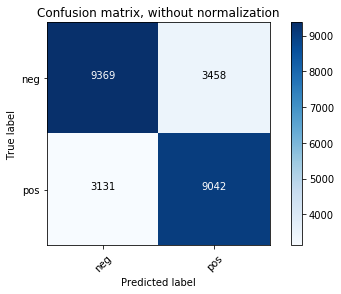

In [23]:
# Create the confusion matrix:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(predicted_dt_test,reviews_test.target)
plot_confusion_matrix(cnf, classes=['neg','pos'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()

#### Calculating the precision and recall measures:
Again as above, two measures can be derived:<br><br>
Recall = TP/(TP+FN) = 9042/(9042+3131) = 74.27%<br>
Precision = TP/(TP+FP) = 9042/(9042+3458) = 72,34%<br>
<br>
Another performance indicator for this model is the F1 score, which is
<br> 2\*(precision\*recall)/(precision+recall) = 2\*0.5372/1,4661 = 0.7328<br>
<br>
Now, we´d like to produce a roc-curve on this model aswell, but intuitively, that requires, that we can work with a "threshold" that can be tuned. Well, the decision tree also has a concept of "probability", which is simply the fraction of the same class in a leaf. This way, we can still produce a ric curve and also the AUC metric:

Area under curve (rbf): 
0.8069889632


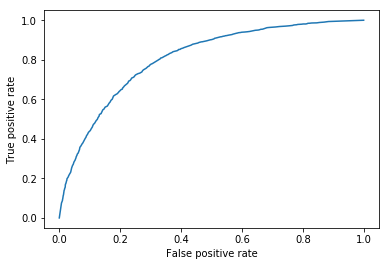

In [27]:
from sklearn import metrics
preds = tree.predict_proba(reviews_test_tfidf_vec)[:,1]
fprNB, tprNB, threshold = metrics.roc_curve(reviews_test.target, preds)

plt.plot(fprNB,tprNB)
print("Area under curve (rbf): \n{}".format(roc_auc_score(reviews_test.target,preds)) )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### Finally, lets try en liniear SVM on the problem 
We´ll start out with default parameters, and check the accuracy and possible overfitting:

In [30]:
start = datetime.datetime.now()
svm=SVC(kernel='linear').fit(reviews_train_tfidf_vec,reviews_train.target)
print("Training took: "+str((datetime.datetime.now()-start).seconds)+" seconds")

start = datetime.datetime.now()
print("Accuracy on training set: {} ".format(svm.score(reviews_train_tfidf_vec, 
                                                       reviews_train.target))) 

print("Accuracy on test set: {} ".format(svm.score(reviews_test_tfidf_vec, 
                                                   reviews_test.target))) 

print("Testing took: "+str((datetime.datetime.now()-start).seconds)
      +" seconds")

Training took: 533 seconds
Accuracy on training set: 0.95388 
Accuracy on test set: 0.87876 
Testing took: 496 seconds


Fitting a SVM on the problem leads to some overfitting, when using standard parameters. As mentioned earlier, the C parameter controls the tradeoff between accurate model and how generalizable it will be. In this case of overfitting, we would accept a less accurate model if it means that it would generalize better. So, lets search for another value for the C parameter that would mitigate the overfitting problem.

In [ ]:
# Do the gridsearch - this takes time - about 98 minutes !
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters={'C':[0.1, 0.01, 0.001]}
gsSvm= GridSearchCV(SVC(gamma=1.0, 
                        kernel='linear'),
                    parameters, 
                    verbose=1).fit(reviews_train_tfidf_vec,
                                   reviews_train.target)


start = datetime.datetime.now()
print("Accuracy on training set: {} ".format(gsSvm.score(reviews_train_tfidf_vec, 
                                                         reviews_train.target))) 

print("Accuracy on test set: {} ".format(gsSvm.score(reviews_test_tfidf_vec, 
                                                     reviews_test.target))) 

print("Best parameters: {} ".format(gsSvm.best_params_))
print("Process took: "+
      str((datetime.datetime.now()-start).seconds)+
      " seconds")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [29]:
start = datetime.datetime.now()
print("Accuracy on training set: {} ".format(svm.score(reviews_train_tfidf_vec, 
                                                       reviews_train.target))) 

print("Accuracy on test set: {} ".format(svm.score(reviews_test_tfidf_vec, 
                                                   reviews_test.target))) 

print("Best parameters: {} ".format(svm.best_params_))
print("Process took: "+
      str((datetime.datetime.now()-start).seconds)+
      " seconds")

Accuracy on training set: 0.89992 
Accuracy on test set: 0.87592 
Best parameters: {'C': 0.1} 


It seems, that finding the right C parameter is quite essential for avoiding overfitting, and that the gridsearch has done a good job. The difference between the accuracy on the training data and the test data is much less than when using an un-tuned algorithm to produce the model. This time there is almost no difference in the accuracies, which means, that there is very little overfitting. Now, lets take a look at the confusion matrix and the ROC-curve.

Confusion matrix, without normalization


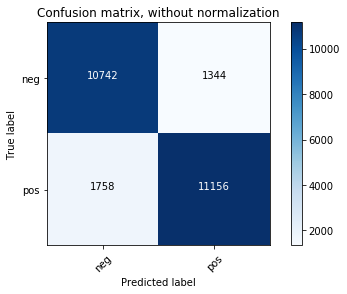

In [37]:
start = datetime.datetime.now()
predicted_gsSvm_test = gsSvm.predict(reviews_test_tfidf_vec)
cnf = confusion_matrix(predicted_gsSvm_test,reviews_test.target)
plot_confusion_matrix(cnf, classes=['neg','pos'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()

print("Process took: "+
      str((datetime.datetime.now()-start).seconds)+
      " seconds")

#### Calculating the precision and recall measures:
Recall = TP/(TP+FN) = 11.156/(11.156+1.758) = 0.8639<br>
Precision = TP/(TP+FP) = 11.156/(11.156+1.344) = 0.8925<br>
F1 = 2\*(precision\*recall)/(precision+recall) = 0.8780<br>

A special note on the ROC curve: since the ROC curve requires, that the model computes a "probability" that an instance belongs to a class, then there is a special interpretation on this for SVM´s, since they fit a hyperplane to separate classes and is thus not a probalistic model per se. Instead, the probability is derived from the instance distance from the separating hyperplane, and thus a ROC curve can still be produced.

Area under curve (rbf): 
0.9470021312


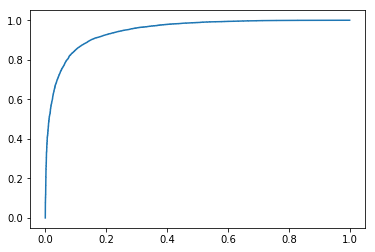

In [38]:
# Note: what is the difference between predict_proba used above and decision_function(data)
start = datetime.datetime.now()
fprSvm, tprSvm, threshold = metrics.roc_curve(reviews_test.target, 
                                              gsSvm.decision_function(reviews_test_tfidf_vec))
plt.plot(fprSvm,tprSvm)
print("Area under curve (rbf): \n{}".format(roc_auc_score(reviews_test.target,
                                                          gsSvm.decision_function(reviews_test_tfidf_vec))))
plt.show()
print("Process took: "+
      str((datetime.datetime.now()-start).seconds)+
      " seconds")

Note, that this is the best model, measured on then AUC measure (0.947)<br>
### Comparing the models: 
Below is a summary on the performance measures for the three models, and from a quality perspective, the Linear SVM beats the other models on (almost) all parameters. However, it might be worth mentioning, that the SVM was by far the one that required the most ressources to be trained, so if that is an important factor a real use-case, then the choice might not be so obvious.


<img src="model_comparison2.png" align='left'>

**Exercise 5:** For this exercise we are returning to the MNIST data, and we are exploring several clustering techniques with it.

**a** Perform *k*-means clustering with *k*=10 on this dataset. Using visualization techniques analogous to what we have done in the `Clustering` notebook for the faces data, can you determine the 'nature' of the 10 constructed clusters? Do the clusters (roughly) coincide with the 10 different actual digits? Perform a supervised clustering evaluation using adjusted rand index. Are the results stable, when you perform several random restarts of *k*-means?

**b** Now perform hierarchical clustering on the data (in order to improve visibility in the constructed dendrograms, you can also use a much reduced dataset as constructed using `sklearn.utils.resample` shown below). Does the visual analysis of the dendrogram indicate a natural number of clusters? Using different cluster distance metrics (ward,single,average), what do the clusterings look like that are producec at the level of *k*=10 clusters? See the `Clustering` notebook for the needed Python code, including the `fcluster` method to retrieve 'plain' clusterings from the hierarchical clustering. 

We´ll start by doing a k-means clustering of our dataset, with k=10. Clustering is _unsupervised_ learning, and yet we supply the 10 as the number of clusters. We do this for llustrative purposes, so that we can compare the clustering with the true groups that we know are there.

In [82]:
start = datetime.datetime.now()
from sklearn.cluster import KMeans
kmeansclus = KMeans(n_clusters=10,n_init=1).fit(mnist.data)
C=kmeansclus.cluster_centers_

print("Process took: "+
      str((datetime.datetime.now()-start).seconds)+
      " seconds")

Process took: 11 seconds


We will illustrate the 10 cluster centers to see, if we can recognize the actual digits in the dataset:

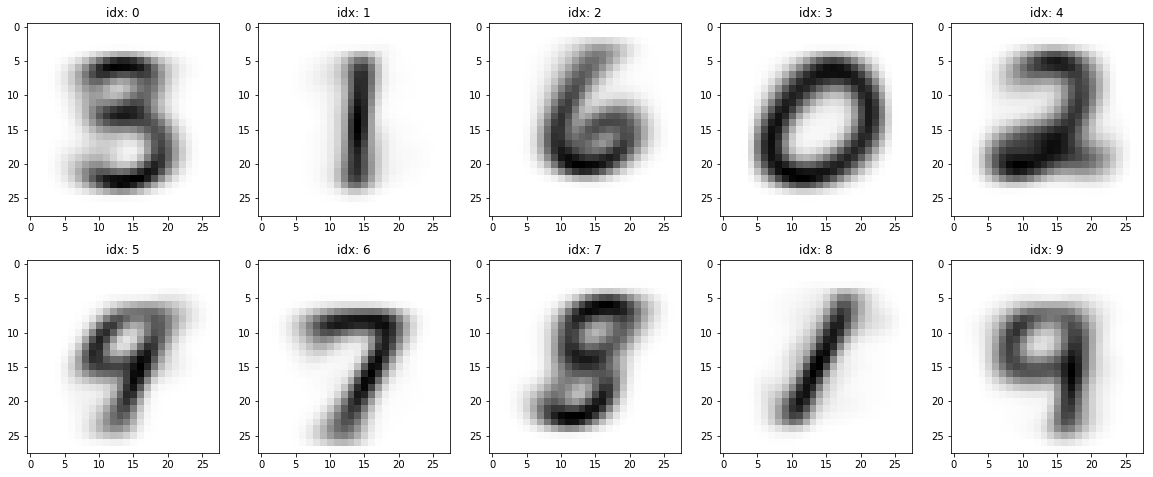

In [90]:
rows=int(10/5)
fig,axes = plt.subplots(rows,5,figsize=(20,4*rows))
for ax,cc,i in zip (axes.ravel(),C,np.arange(axes.ravel().size)):
    ax.set_title("idx: {}".format(i))
    ax.imshow(C[i].reshape(28,28),cmap=plt.cm.gray_r)
plt.show() 

It looks like most of the digits are actually recognizable - digits <br>
idx0: looks like 3<br>
idx1: looks like 1<br>
idx2: looks like 6<br>
idx3: looks like 0<br>
idx4: looks like 2<br>
idx5: looks like 4 - might be a 9 ?<br>
idx6: looks like 7<br>
idx7: looks like 8<br>
idx8: looks like 1 - hey, we had that already! Looks like 1 is written in two distinct ways: straight down and slightly tilted<br>
idx9: looks like 9

So, it looks like there is a little confusion about 4/9 and 1 is written in two different ways. What about 5 ?<br>
Lets take a look find out where they are hiding by finding all the correct 5´s and which clusters they have been assigned to.

Number of 5´s: 6313
[[   0    1    2    3    4    5    6    7    8    9]
 [2017  182  131   69   19  659   20 2113  730  373]]


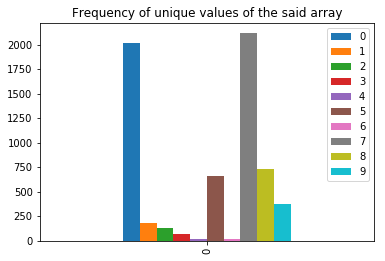

In [167]:
import pandas as pd
mnist_5=mnist.data[mnist.target==5]
ds=kmeansclus.predict(mnist_5.data)
print("Number of 5´s: "+str(ds.size))

unique_elements, counts_elements = np.unique(ds, return_counts=True)
data=np.asarray((unique_elements, counts_elements))
print(data)

df = pd.DataFrame(counts_elements.reshape(-1, len(counts_elements)),
                  columns=unique_elements)

df.plot.bar(title='Frequency of unique values of the said array', 
            legend=True)
plt.show()



Looks like there are 6313 5´s in the dataset, and they are mostly captured by cluster indices 0 (which looks like three) and 7 (which looks like eigth). Knowing this, you could make the case, that both numbers three and eight have the low half circle (judging by the cluster centers) as five does. <br>
Lets look at the instances closest to the cluster centers :

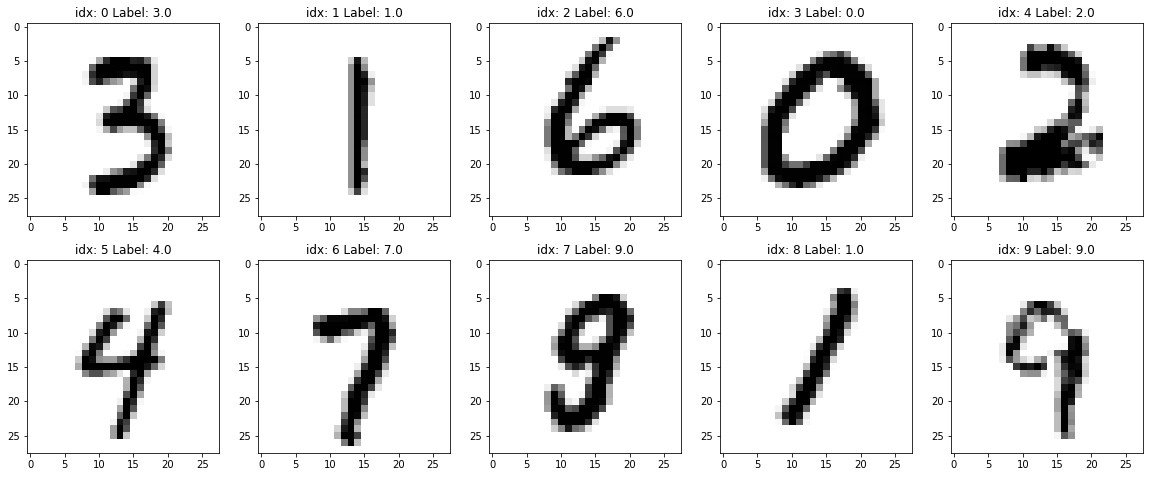

In [168]:
distances=kmeansclus.transform(mnist.data)
pseudo_medoids=np.argmin(distances,axis=0)

rows=int(10/5)
fig,axes = plt.subplots(rows,5,figsize=(20,4*rows))
for ax,cc,i in zip (axes.ravel(),
                    mnist.data[pseudo_medoids],
                    np.arange(axes.ravel().size)):
    
    ax.set_title("idx: {} Label: {}".format(i,mnist.target[pseudo_medoids][i]))
    ax.imshow(mnist.data[pseudo_medoids][i].reshape(28,28),cmap=plt.cm.gray_r)
plt.show() 

Well, comparing what the clustercenters look like and what the closest instance suggest that they are, there still is some confusion:

idx0: looks like 3 - and the closest is actually a 3<br>
idx1: looks like 1 - and the closest is actually a 1<br>
idx2: looks like 6 - and the closest is actually a 6<br>
idx3: looks like 0 - and the closest is actually a 0<br>
idx4: looks like 2 - and the closest is actually a 2<br>
idx5: looks like 4 - might be a 9 ? - the closest instances suggests 4<br>
idx6: looks like 7 - and the closest is actually a 7<br>
idx7: looks like 8 - hey, the closest one is actually a 9<br>
idx8: looks like 1 - the closest is actually also a 1, which supports the suggestion, that 1 is written in two ways<br>
idx9: looks like 9 - and the closest is actually a 9<br><br>
The conclusion is, that it looks like there are 6 clear clusters, and 4 that are a little less clear.

Since we know the true label of the images, we can calculated the "adjusted rand score" as a measure of simmilarity between the cluster assignments of instances and the "real" cluster defined by the known labels of the dataset. A completely random cluster assignment results in a score close to 0.0 while the perfect match returns 1.0.

In [170]:
metrics.adjusted_rand_score(mnist.target, kmeansclus.predict(mnist.data))  

0.40788707109806216

Now, with this measure, we can test how stable then clustering is over iterations - thus how generalizable is it. We will iterate 10 times - for each iteration:
* Fit the model
* Predict the cluster using the model
* calculate the Adjusted Rand Score for simmilarity<br>

We will (obviously) not use a random_state for the clustering, because this would give us the same result every time, and the aim is to test, how stable the clustering is.

In [268]:
for i in list(range(0,10)):   
    kmeansclus = KMeans(n_clusters=10,n_init=1).fit(mnist.data)
    print("Iteration "+str(i)+": adjusted_rand_score: "+
          str(metrics.adjusted_rand_score(mnist.target, 
                                          kmeansclus.predict(mnist.data))))
    
    scores.append(metrics.adjusted_rand_score(mnist.target, 
                                              kmeansclus.predict(mnist.data)) )
print("Standard deviations between the scores are: " + 
      str(np.std(np.asarray(scores))))

Iteration 0: adjusted_rand_score: 0.361990619464
Iteration 1: adjusted_rand_score: 0.363332391083
Iteration 2: adjusted_rand_score: 0.394239890383
Iteration 3: adjusted_rand_score: 0.393421618665
Iteration 4: adjusted_rand_score: 0.367407038582
Iteration 5: adjusted_rand_score: 0.364699608937
Iteration 6: adjusted_rand_score: 0.393423894953
Iteration 7: adjusted_rand_score: 0.433512262993
Iteration 8: adjusted_rand_score: 0.367609004676
Iteration 9: adjusted_rand_score: 0.367399433488
Standard deviations between the scores are: 0.190971848077


The above result shows, that clustering with K-means is very sensitive to restarting, mainly because of the random starting point this method has. The rand score fluctuates quite a bit, and the standard deviation is quite high when looking at the actual values.

## Hierarchical clustering
We´ll start by reducing the dataset, so that the below visualizations work better

In [186]:
small_mnist_data,small_mnist_label = skl.utils.resample(mnist.data,
                                                        mnist.target,
                                                        n_samples=200,
                                                        replace='false')

Bolow is illustrated the dendogram - a visualization of the hiearachical clustering

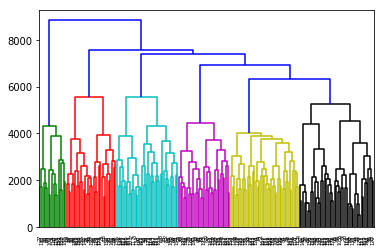

In [246]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,ward,single,average,fcluster
linkage_array=ward(small_mnist_data)
dendrogram(linkage_array)
plt.showticklabels=False
plt.show()

It looks like there´s 6 natural clusters in the dataset, atleast when using ward distance measure. This actually corresponds to our findings above, where we manually inspected the cluster centers. If that is true, then asking K-means to generate 6 clusters (instead of 10) would probably be a lot more stable:

In [200]:
scores = []
for i in list(range(0,10)):   
    kmeansclus = KMeans(n_clusters=6,n_init=1).fit(mnist.data)
    print("Iteration "+str(i)+": adjusted_rand_score: "+
          str(metrics.adjusted_rand_score(mnist.target, 
                                          kmeansclus.predict(mnist.data))))
    
    scores.append(metrics.adjusted_rand_score(mnist.target, 
                                              kmeansclus.predict(mnist.data)) )
print("Standard deviations between the scores are: " + 
      str(np.std(np.asarray(scores))))


Iteration 0: adjusted_rand_score: 0.341651693039
Iteration 1: adjusted_rand_score: 0.332785635935
Iteration 2: adjusted_rand_score: 0.332786426554
Iteration 3: adjusted_rand_score: 0.332431324311
Iteration 4: adjusted_rand_score: 0.332785635935
Iteration 5: adjusted_rand_score: 0.332827524277
Iteration 6: adjusted_rand_score: 0.33240098584
Iteration 7: adjusted_rand_score: 0.332387223329
Iteration 8: adjusted_rand_score: 0.332785635935
Iteration 9: adjusted_rand_score: 0.332390726045
Standard deviations between the scores are: 0.00271580003831


The standard deviation actually went down, but that actually also makes a lot of sense for another reason - if we were to turn the number of clusters down to 1 - and thus getting the same cluster every time, then the standard deviation would go to 0. This also underlines, that the fewer clusters wanted, the more stable the clustering model we will get, but the adjusted_rand_score will also drop to 0, giving us no value at all in the clustering effort. <br><br>Just for fun, we´ll try it anyway:

In [249]:
scores = []
for i in list(range(0,10)):   
    kmeansclus = KMeans(n_clusters=1,n_init=1).fit(mnist.data)
    scores.append(metrics.adjusted_rand_score(mnist.target, 
                                              kmeansclus.predict(mnist.data)) )
print("Standard deviations between the scores are: " + 
      str(np.std(np.asarray(scores))))


Standard deviations between the scores are: 0.0


The above example was generated with a "ward" merge-criterion. Basically, this method merges clusters on the basis of _minimum_ _variance_. This means, that the two clusters (or instances to begin with) that - when merged - result in the lowest variance between instances, will be chosen for the merge.<br><br> Another criterion would be the "single" or "best link" which merges the "closets" instance or cluster - this could also be called "nearest neighbor". When building the hierarcical clustering with this criterion, the dendogram looks quite different. It seems, that gives us a lot more "natural" clusters, when using this method :

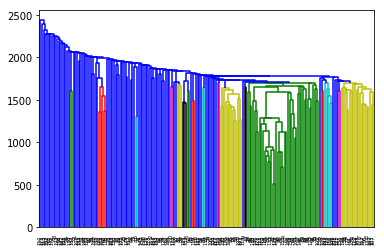

In [250]:
linkage_array=single(small_mnist_data)
dendrogram(linkage_array)
plt.showticklabels=False
plt.show()

Lastly, below is a third method of choosing which clusters to merge - the _average_ method. This takes a pairwise look at all members in the first cluster and the second cluster, and computes the _average_ distance between these. The two clusters with the lowest average distance are chosen for the next merge. As seen below, this gives us even more "natural" clusters

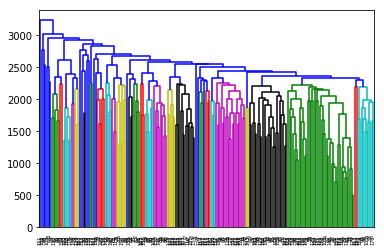

In [251]:
linkage_array=average(small_mnist_data)
dendrogram(linkage_array)
plt.showticklabels=False
plt.show()

We are actually looking to cluster with k=10, because there are 10 known digits in the dataset. Since there is no elegant way of getting the hierarcical cluster information at the right threshold for the distance function that returns the k=10 clustering, we´ll brute-force the cut-off until we find the first cut-off that returns the clustering with k=10. <br><br>We´ll write this as a function, since we will be using it with different merge criteria (ward, single, average):

In [266]:
def cutOffHiearcicalCluster(numberOfClusters, la):
    prev_unique_elements=0
    for distance in list(range(1,1000000)):
        N=fcluster(la,distance,criterion='distance')
        unique_elements, counts_elements = np.unique(N, return_counts=True)
        if unique_elements.size <= numberOfClusters:
            print("Number of clusters: "+str(unique_elements.size)+
                  " at distance: "+str(distance))
            
            break
        prev_unique_elements = unique_elements.size
    return N

clst_ward = cutOffHiearcicalCluster(10,ward(small_mnist_data))
clst_single = cutOffHiearcicalCluster(10,single(small_mnist_data))
clst_average = cutOffHiearcicalCluster(10,average(small_mnist_data))

Number of clusters: 10 at distance: 4465
Number of clusters: 10 at distance: 2240
Number of clusters: 10 at distance: 2695


Having the output of the hierarchical clustering with the three differente merge criteria (cut of at k=10), we can now compare them with the actual "clusters", aka label-groups, by using the rand score from earlier:

In [267]:
print("Adjusted Rand Score for hierarcical clustering using Ward: "+
      str(metrics.adjusted_rand_score(small_mnist_label, clst_ward)))

print("Adjusted Rand Score for hierarcical clustering using Single: "+
      str(metrics.adjusted_rand_score(small_mnist_label, clst_single)))

print("Adjusted Rand Score for hierarcical clustering using Average: "+
      str(metrics.adjusted_rand_score(small_mnist_label, clst_average)))

Adjusted Rand Score for hierarcical clustering using Ward: 0.339200689885
Adjusted Rand Score for hierarcical clustering using Single: -0.00221078525
Adjusted Rand Score for hierarcical clustering using Average: 0.0300562895868


As seen, this score supports the intuition, that the Ward-hierarchical clustering closest resemble what looked like the "natural number of clusters" of 6 (we know the real answer to be 10). Also, when using hiarachical clustering to find the "natural number" of clusters, it does in fact matter a lot, which merge-criterion is used.